# Homework 1

## References

+ Lectures 1 through 4 (inclusive).


## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import numpy as np
import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name:** Rohan
+ **Last Name:** Dekate
+ **Email:** dekate@purdue.edu
+ **Used generative AI to complete this assignment (Yes/No):** No
+ **Which generative AI tool did you use (if applicable)?:** NA
$\pagebreak$

## Problem 1

Disclaimer: This example is a modified version of the one found in a 2013 lecture on Bayesian Scientific Computing taught by Prof. Nicholas Zabaras.
I am not sure where the original problem is coming from.

We are tasked with assessing the usefulness of a tuberculosis test.
The prior information I is:

> The percentage of the population infected by tuberculosis is 0.4\%.
We have run several experiments and determined that:
+ If a tested patient has the disease, then 80\% of the time the test comes out positive.
+ If a tested patient does not have the disease, then 90\% of the time the test comes out negative.

To facilitate your analysis, consider the following logical sentences concerning a patient:

> A: The patient is tested and the test is positive.

> B: The patient has tuberculosis.

A. Find the probability that the patient has tuberculosis (before looking at the result of the test), i.e., $p(B|I)$. This is known as the base rate or the prior probability.

**Answer:**

As 0.4% of population is infected by Tuberculosis (TB),

$p(TB) = 0.004 \\$

Hence

$p(B|I) = p(TB)=0.004 \\$

B. Find the probability that the test is positive given that the patient has tuberculosis, i.e., $p(A|B,I)$.

**Answer:**

We know that
*   If a tested patient has the disease, then 80% of the time the test comes out positive.

This implies

$p(A|B,I) = 0.8$




C. Find the probability that the test is positive given that the patient does not have tuberculosis, i.e., $p(A|\neg B, I)$.

**Answer:**

We know that
*   If a tested patient does not have the disease, then 90% of the time the test comes out negative.

$p(A|\neg B, I) + p(A|\neg B, I) = 1\\$

This implies, $p(A|\neg B, I) = 1 - 0.9 = 0.1$




D. Find the probability that a patient that tested positive has tuberculosis, i.e., $p(B|A,I)$.

**Answer:**

$p(B|A,I) = \frac{p(A|B,I)*p(B|I)}{p(A|B,I)*p(B|I) + p(A|\neg B,I)*p(\neg B | I)} \\$

$p(B|A,I) = \frac{0.8*0.004}{(0.8*0.004) +(0.1*0.996)} ≈ 0.031$

E. Find the probability that a patient that tested negative has tuberculosis, i.e., $p(B|\neg A, I)$. Does the test change our prior state of knowledge about about the patient? Is the test useful?

**Answer:**

$p(B|\neg A,I) = \frac{p(\neg A|B,I)*p(B|I)}{p(\neg A|B,I)*p(B|I) + p(\neg A|\neg B,I)*p(\neg B | I)} \\$

$p(B|\neg A,I) = \frac{0.2*0.004}{(0.2*0.004) +(0.9*0.996)} = 0.0008916629514043692 ≈ 0.001 \\$

* Our prior state of knowledge about the patient is that 0.4% of the population has TB. This test does not change our prior state of knowledge.
* There is only a 0.1% probability that the patient has tuberculosis given the test is negative. This is a very small value and thus the test is useful.

F. What would a good test look like? Find values for

$$
p(A|B,I)= p(\text{test is positive} |\text{has tuberculosis},I),
$$

and

$$
p(A| \neg B, I) = p(\text{test is positive}|\text{does not have tuberculosis}, I),
$$

so that

$$
p(B|A, I) = p(\text{has tuberculosis}|\text{test is positive}, I) = 0.99.
$$

There are more than one solutions. How would you pick a good one? Thinking in this way can help you set goals if you work in R\&D. If you have time, try to figure out whether or not there exists such an accurate test for tuberculosis

**Answer:**

$p(B|A,I) = \frac{p(A|B,I)*p(B|I)}{p(A|I)} = 0.99 \\$

$p(A|I) = p(A|B,I)*p(B|I) + p(A|¬B,I)*p(¬B|I) \\$

$p(B|I) = 0.004 \\$

$p(\neg B|I) = 1- 0.004 = 0.996 \\$

$p(A|I) = p(A|B,I)*0.004 + p(A|\neg B,I)*0.996 \\$

$0.99 = \frac{p(A|B,I)*0.004}{p(A|I)} \\$

$0.99 = \frac{p(A|B,I)*0.004}{p(A|B,I)*0.004 + p(A|\neg B,I)*0.996} \\$

Let $p(A|B,I) = 0.98 \\$

This implies that $p(A=Test Positive|B,I = Patient has TB) = 0.98$ or the test should give accurate results when the patient has TB is 98%.

We would want a high value for this as the test should be highly accurate at detecting TB in patients.

Solving for $p(A|\neg B,I)$



In [ ]:
p_A_given_B = 0.98
print(f"Let p(test is positive|has tuberculosis,𝐼) = \
{p_A_given_B:.3f}")
p_A_given_not_B = ((p_A_given_B*0.004/0.99) - (p_A_given_B*0.004))/0.996
print(f"p(test is positive|does not have tuberculosis,𝐼) = \
{p_A_given_not_B}")

Let p(test is positive|has tuberculosis,𝐼) = 0.980
p(test is positive|does not have tuberculosis,𝐼) = 3.975497951401596e-05


Let

$𝑝(𝐴|𝐵,𝐼)$ =𝑝(test is positive|has tuberculosis,𝐼) = 0.980

$𝑝(𝐴|¬𝐵,𝐼)$=𝑝(test is positive|does not have tuberculosis,𝐼) = 3.975497951401596e-05

$\pagebreak$

## Problem 2 - Practice with discrete random variables

Consider the Categorical random variable:

$$
X \sim \operatorname{Categorical}(0.3, 0.1, 0.2, 0.4),
$$

taking values in $\{0,1,2,3\}$. Find the following (you may use ``scipy.stats.rv_discrete`` or do it by hand):

A. The expectation $\mathbb{E}[X]$.

**Answer:**

$\mathbb{E}[X] = 1.70$

In [ ]:
# You can also answer with code here:
# Import the scipy.stats library
import scipy.stats as st
# Import Numpy
import numpy as np
# Define the probabilities:
ps = [0.3,0.1,0.2,0.4]
# And here are the corresponding values
xs = np.array([0,1,2,3])
# Here is how you can define a categorical rv:
X = st.rv_discrete(name="Custom Categorical", values=(xs, ps))

In [ ]:
print(f"E[X] = {X.expect()}")

E[X] = 1.7000000000000002


B. The variance $\mathbb{V}[X]$.

**Answer:**

$\mathbb{V}[X] = 1.61$

In [ ]:
# You can also answer with code here:
print(f"V[X] = {X.var()}")

V[X] = 1.6099999999999994


C. Plot the probability mass function of $X$.

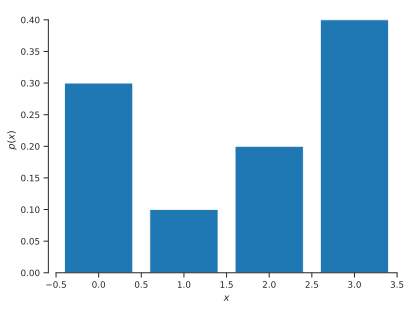

In [ ]:
# Your code here. Hint: use a bar plot
fig, ax = plt.subplots()
ax.bar(xs, X.pmf(xs))
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")
sns.despine(trim=True);

D. Find the probability that $X$ is in $\{0, 2\}$.

**Answer:**

$p(X=${0,2}$) = 0.5$

In [ ]:
# You can also answer with code here:
print(f"p(X=[0,2]) = {X.pmf(0)+X.pmf(2):.3f}")

p(X=[0,2]) = 0.500


E. Find $\mathbb{E}[4X + 3]$.

**Answer:**

$\mathbb{E}[4X+3] = \mathbb{E}[4X]+3 = 4\mathbb{E}[X]+3$

In [ ]:
# You can also answer with code here:
E_eX = 4*X.expect()+3
print(f"E[4X+3] = {E_eX:.3f}")

E[4X+3] = 9.800


F. Find $\mathbb{V}[4X+3]$.

**Answer:**

$\mathbb{V}[4X+3] = \mathbb{V}[4X] = 4^2 * \mathbb{V}[X]$

In [ ]:
# You can also answer with code here:
print(f"V[4X+3] = {4*4*X.var()}")

V[4X+3] = 25.75999999999999


$\pagebreak$

## Problem 3 - Predicting the probability of major earthquakes in Southern California

The [San Andreas fault](https://en.wikipedia.org/wiki/San_Andreas_Fault) extends through California forming the boundary between the Pacific and the North American tectonic plates.
It has caused some of the major earthquakes on Earth.
We are going to focus on Southern California and we would like to assess the probability of a major earthquake, defined as an earthquake of magnitude 6.5 or greater, during the next ten years.

A. The first thing we are going to do is go over a [database of past earthquakes](https://scedc.caltech.edu/significant/chron-index.html) that have occured in Southern California and collect the relevant data. We are going to start at 1900 because data before that time may are unreliable.
Go over each decade and count the occurence of a major earthquake (i.e., count the number of organge and red colors in each decade). We have done this for you.

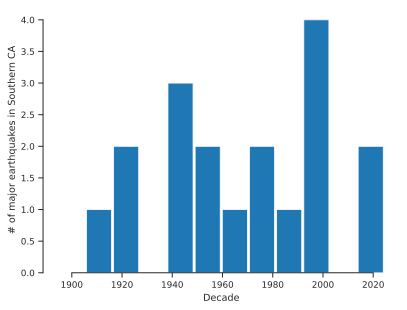

In [ ]:
eq_data = np.array([
    0, # 1900-1909
    1, # 1910-1919
    2, # 1920-1929
    0, # 1930-1939
    3, # 1940-1949
    2, # 1950-1959
    1, # 1960-1969
    2, # 1970-1979
    1, # 1980-1989
    4, # 1990-1999
    0, # 2000-2009
    2 # 2010-2019
])
fig, ax = plt.subplots(dpi=150)
ax.bar(np.linspace(1900, 2019, eq_data.shape[0]), eq_data, width=10)
ax.set_xlabel('Decade')
ax.set_ylabel('# of major earthquakes in Southern CA')
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

B. The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution with values $\{0,1,2,\dots\}$ which is commonly used to model the number of events occuring in a certain time period.
It is the right choice when these events are happening independently and the probability of any event happening over a small period of time is constant.
Let's use the Poisson to model the number of earthquakes $X$ occuring in a decade.
We write:

$$
X \sim \operatorname{Poisson}(r),
$$

where $r$ is the *rate parameter* of Poisson.
The rate is the number of events per time period.
Here, $r$ is the number of earthquakes per decade.
Using the data above, we can set the rate as the empirical average of the observed number of earthquakes per decade:

In [ ]:
r = np.mean(eq_data)
print('r = {0:1.2f} major earthquakes per decade'.format(r))

r = 1.50 major earthquakes per decade


Strictly speaking, **this is not how you should be calibrating models!!!**
We will learn about the **right** way (which uses Bayes' rule) in the subsequent lectures.
But it will do for now as the answer you would get using the **right** way is, for this problem, almost the same.
Let's define a Poisson distribution using ``scipy.stats.poisson`` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)):

In [ ]:
X = st.poisson(r)

A. Plot the probability mass function of ``X``.

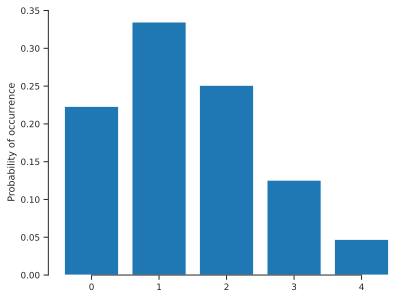

In [ ]:
# Your code here
ks = X.mean()+3*X.std()
ks = range(int(ks))
fig, ax = plt.subplots()
ax.bar(ks, X.pmf(ks))
# ax.set_xlabel('Number of major earthquakes in next 100 years')
ax.set_ylabel('Probability of occurrence')
sns.despine(trim=True);

B. What is the probability that at least one major earthquake will occur during the next decade?<br>
**Answer:**
<br><br><br><br><br><br><br><br>

In [ ]:
# You can also answer with code here:
# What is the probability that no earthquakes happen?
p_0 = X.pmf(0)
# Then the probability of at least one major earthquake is
p_atleast_1 = 1 - p_0
print(f"The probability that at least one major earthquake will occur during \
the next decade is\nP(X>=1) = {p_atleast_1:.3f}")

The probability that at least one major earthquake will occur during the next decade is
P(X>=1) = 0.777


C. What is the probability that at least one major earthquake will occur during the next two decades?

Hint: Consider two independent and identical copies of $X$, say $X_1$ and $X_2$.

And consider their sum $Y = X_1 + X_2$. Read [this](https://en.wikipedia.org/wiki/Poisson_distribution#Sums_of_Poisson-distributed_random_variables) about the sum of two independent Poisson distributions.

**Answer:**

$X_i ∼ Pois(λ_i)$ for $i = 1,2,...,n$ are independent then

$∑_{i=1}^{n}X_i ∼ Pois(∑_{i=1}^{n}λ_i) \\$

Here r = $λ$ = 1.5

$\therefore X_1 + X_2 ∼ Pois(3)$

In [ ]:
# You can also answer with code here:
X1X2 = st.poisson(r+r)
# What is the probability that no earthquakes happen?
p_0 = X1X2.pmf(0)
# Then the probability of at least one major earthquake is
p_atleast_1 = 1 - p_0
print(f"The probability that at least one major earthquake will occur during \
the next two decades is\nP(X>=1) = {p_atleast_1:.3f}")

The probability that at least one major earthquake will occur during the next two decades is
P(X>=1) = 0.950


D. What is the probability that at least one major earthquake will occur during the next five decades?

**Answer:**

Using the result of Sums of Poisson-distributed random variables from previous problem

$∑_{i=1}^{n}X_i ∼ Pois(∑_{i=1}^{n}λ_i) \\$

Here r = $λ$ = 1.5

$\therefore X_1 + X_2 + X_3 + X_4 + X_5 ∼ Pois(7.5)$

In [ ]:
# You can also answer with code here:
X1_X5 = st.poisson(5*r)
# What is the probability that no earthquakes happen?
p_0 = X1_X5.pmf(0)
# Then the probability of at least one major earthquake is
p_atleast_1 = 1 - p_0
print(f"The probability that at least one major earthquake will occur during \
the next five decades is\nP(X>=1) = {p_atleast_1:.3f}")

The probability that at least one major earthquake will occur during the next five decades is
P(X>=1) = 0.999


$\pagebreak$

## Problem 4 - Failure of a mechanical component

Assume that you designing a gear for a mechanical system.
Under normal operating conditions the gear is expected to fail at a random time.
Let $T$ be a random variable capturing the time the gear fails.
What should the probability density of $T$ look like?

Here are some hypothetical data to work with.
Suppose that we took ten gears and we worked them until failure.
The failure times (say in years) are as follows:

In [ ]:
time_to_fail_data = np.array(
    [
        10.5,
        7.5,
        8.1,
        8.4,
        11.2,
        9.3,
        8.9,
        12.4
    ]
)

Why does each gear fail at different times?
There are several sources of uncertainty.
The most important are:

- Manufacturing imperfections.
- Different loading conditions.

If this was a controlled fatigue experiment, then we could eliminate the second source of uncertainty by using exactly the same loading conditions.

Now, we are going to fit a probability density function to these data.
Which one should we use?
Well, new gears do not fail easily.
So, the probability density function of $T$ should be close to zero for small $T$.
As time goes by, the probability density should increase because various things start happening to the material, e.g., crack formation, fatigue, etc.
Finally, the probability density must again start going to zero as time further increases because nothing lasts forever...
A probability distribution that is commonly used to model this situation is the [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution).
We are going to fit some fail time data to a Weibull distribution and then you will have to answer a few questions about failing times.

The Weibull has parameters and we are going to fit them to the available data.
The method we are going to use is called the *maximum likelihood method*.
We haven't really talked about this, and it is not important to know what it is to do this homework problem.
We will learn about maximum likelihood in later lectures.
Here is how we fit the parameters using `scipy.stats`:

In [ ]:
fitted_params = st.exponweib.fit(time_to_fail_data, loc=0)
T = st.exponweib(*fitted_params)
print(f"Fitted parameters: {fitted_params}")

Fitted parameters: (448.066965711728, 0.7099665338918923, 3.4218808260575804, 0.41627831297126994)


Let's plot the fitted Weibul PDF and the data we used:

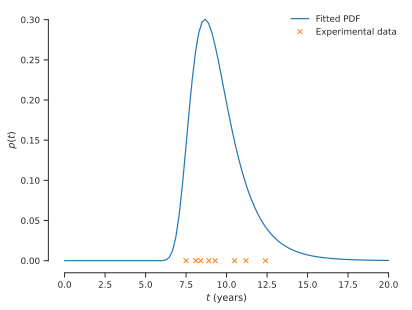

In [ ]:
fig, ax = plt.subplots()
ts = np.linspace(0.0, 20.0, 100)
ax.plot(
    ts,
    T.pdf(ts),
    label="Fitted PDF"
)
ax.plot(
    time_to_fail_data,
    np.zeros_like(time_to_fail_data),
    "x",
    label="Experimental data"
)
ax.set_xlabel(r"$t$ (years)")
ax.set_ylabel(r"$p(t)$")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);

Now you have to answer a series of questions about the random variable $T$ that we just fitted.

A. Find the mean fail time and its variance.
Hint: Do not integrate anything by hand. Just use the functionality of ``scipy.stats``.

In [ ]:
# Your code here
t_mean = T.mean() # Change me
t_var = T.var() # Change me
print(f"E[T] = {t_mean:.2f}")
print(f"V[T] = {t_var:.2f}")

E[T] = 9.53
V[T] = 2.88


B. Plot the cumulative distribution function $F(t) = P(T\le t)$ of $T$.

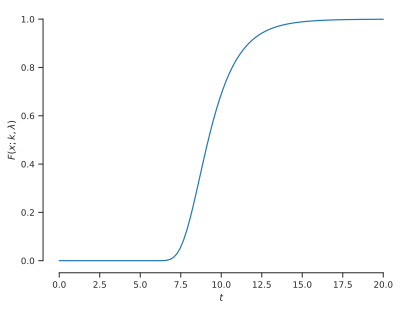

In [ ]:
# Your code here
fig, ax = plt.subplots()
ax.plot(ts, T.cdf(ts))
ax.set_xlabel("$t$")
ax.set_ylabel("$F(x;k,\lambda)$")
sns.despine(trim=True);

C. Plot the probability that gear survives for more than $t$ as a function of $t$.
That is, plot the function:

$$
S(t) = p(T > t).
$$

Hint: First connect $S(t)$ to the cumulative distribution function $F(t)$ of $T$.

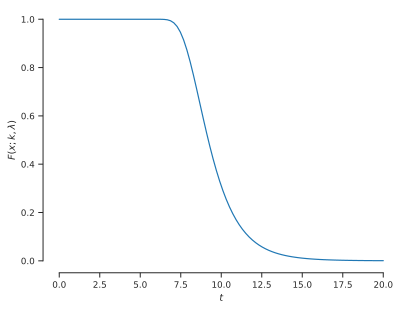

In [ ]:
# Your code here
fig, ax = plt.subplots()
ax.plot(ts, 1 - T.cdf(ts))
ax.set_xlabel("$t$")
ax.set_ylabel("$F(x;k,\lambda)$")
sns.despine(trim=True);

D. Find the probability that the gear lasts anywhere between 8 and 10 years.

$p(8≤ X ≤ 10) = F(10) - F(8)$

In [ ]:
# Your code here
print(f"The probability that the gear lasts anywhere between 8 and 10 years is \
{T.cdf(10) - T.cdf(8):.3f}")

The probability that the gear lasts anywhere between 8 and 10 years is 0.534


E. Find the time $t^*$ such that the probability that the gear fails before $t^*$ is $0.01$.

In [ ]:
print(f"t* = {T.ppf(0.01):.3f}")

t* = 6.975
